In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Data Loading & Basic Cleaning

In [74]:
df=pd.read_csv(r"C:\PROJECTS\Customer Churn & Lifetime Value (CLV) Analytics\dataset\Telco-Customer-Churn_Raw.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [75]:
df.shape

(7043, 21)

In [76]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [77]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [78]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [79]:
# Fix TotalCharges datatype
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [80]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [81]:
# Handle missing values (mostly tenure = 0 cases)
df["TotalCharges"].fillna(0, inplace=True)

In [82]:
# Check target distribution
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


### Feature Engineering

In [83]:
# Binary churn flag
df["churn_flag"] = df["Churn"].map({"Yes": 1, "No": 0})

In [84]:
# Tenure buckets
df["tenure_group"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 24, 48, 72],
    labels=["0-12", "12-24", "24-48", "48+"],
    include_lowest=True
)

### Exploratory Data Analysis (EDA)

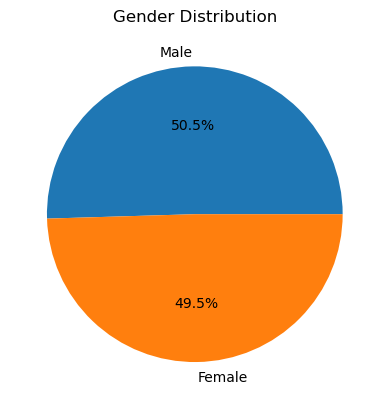

In [85]:
# Gender Distribution
gender = df['gender'].value_counts()
plt.pie(gender,labels=gender.index,autopct='%0.1f%%')
plt.title('Gender Distribution')
plt.show()

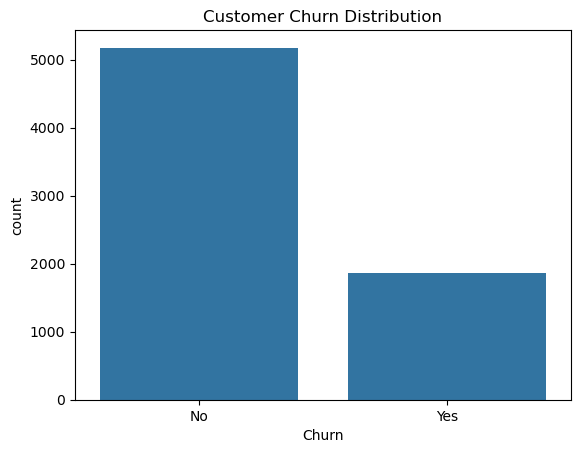

In [86]:
# Customer Churn Distribution

sns.countplot(x='Churn',data=df)
plt.title('Customer Churn Distribution')
plt.show()

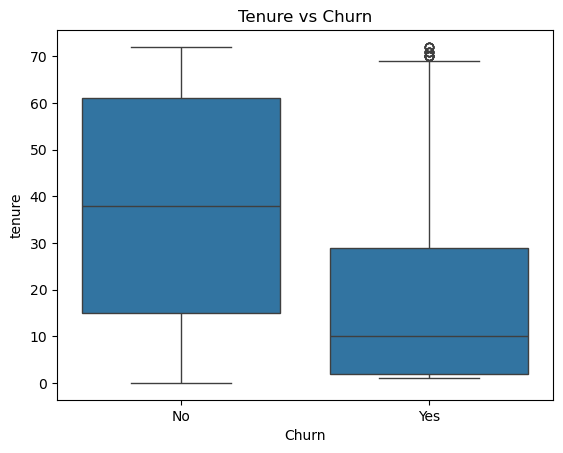

In [87]:
# Tenure vs Churn
sns.boxplot(x='Churn',y='tenure',data=df)
plt.title("Tenure vs Churn")
plt.show()

In [88]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

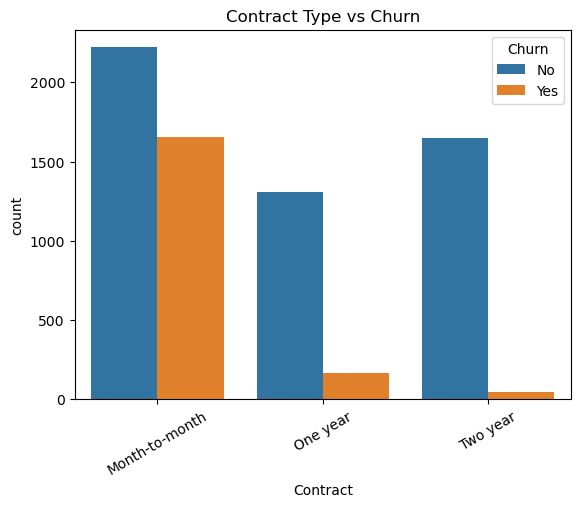

In [89]:
# Contract vs Churn
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=30)
plt.show()

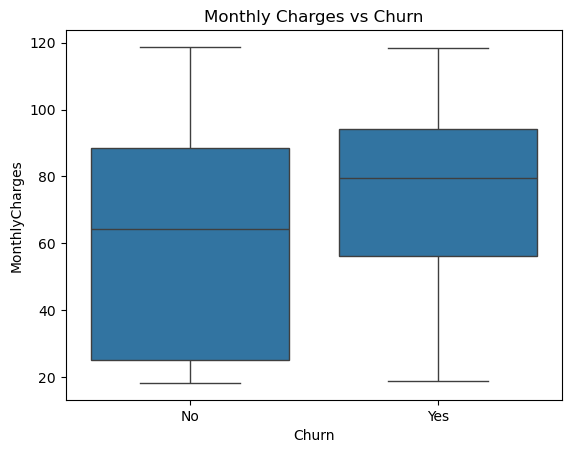

In [90]:
# Monthly Charges vs Churn
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

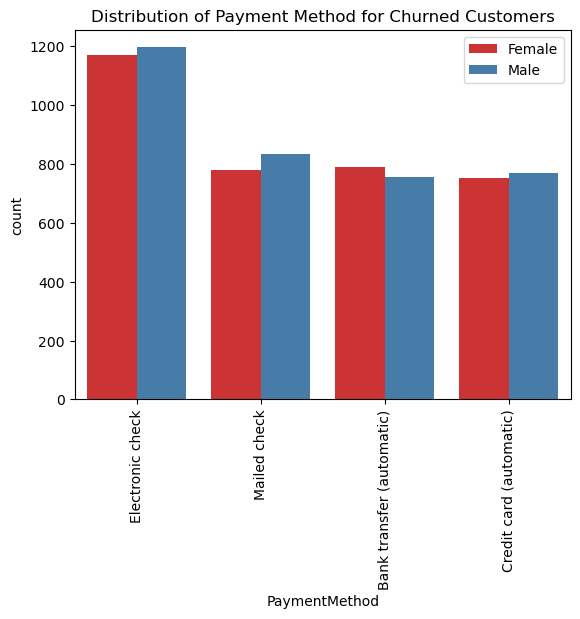

In [91]:
# Distribution of Payment Methods for Churned Customers
sns.countplot(x='PaymentMethod',hue='gender',data=df,palette='Set1')
plt.xticks(rotation=90)
plt.title("Distribution of Payment Method for Churned Customers")
plt.legend(title=None)
plt.show()

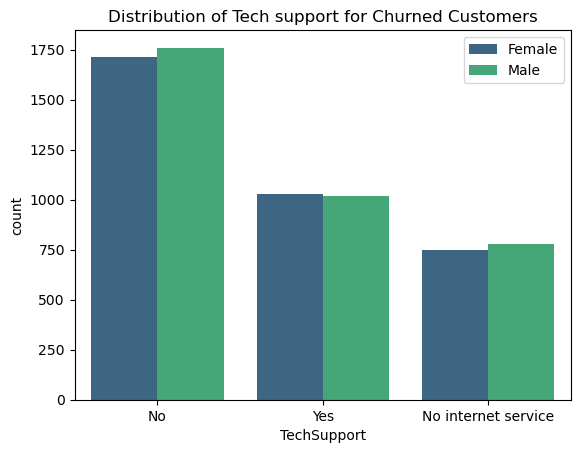

In [92]:
# Distribution of Tech support for Churned Customers
sns.countplot(x='TechSupport',hue='gender',data=df,palette='viridis')
plt.title("Distribution of Tech support for Churned Customers")
plt.legend(title=None)
plt.show()

In [93]:
# Overall Churn rate
churn_rate=df['churn_flag'].mean() * 100
print("Overall Churn Rate: ", churn_rate)

Overall Churn Rate:  26.536987079369588


In [94]:
# Churn By Contract
churn_by_contract = (df.groupby('Contract')['churn_flag'].mean().sort_values(ascending=False) * 100)
print("Churn by contract:\n",churn_by_contract)

Churn by contract:
 Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: churn_flag, dtype: float64


In [95]:
# Average charges by churn status
avg_charges=df.groupby("Churn")["MonthlyCharges"].mean()
print("Average Charges by Churn Status:\n",avg_charges)

Average Charges by Churn Status:
 Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64


In [96]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_flag,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0,24-48
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,24-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0-12


In [97]:
df.to_csv(r"C:\PROJECTS\Customer Churn & Lifetime Value (CLV) Analytics\dataset\Telco-Customer-Churn_Cleaned.csv")

#### Conclusion
- Customer tenure is a strong predictor of churn, new customers are more likely to churn, while long-tenured customers tend to stay.
- Customers on month-to-month contracts exhibit significantly higher churn compared to those on one-year or two-year contracts, indicating that contract commitment plays a critical role in customer retention.
- churned customers have a significantly higher median monthly charge (approximately $80) compared to retained customers (approximately $65).
- Lack of tech support is a major driver of customer churn—customers without tech support churn significantly more than those who receive it. Gender has little to no impact on this behavior, indicating that service availability, not demographics, is the key factor influencing churn.
- The overall churn rate is approximately 26.5%, indicating that about one in four customers leave the service.